In [25]:
import scipy.stats as stat
import matplotlib.pyplot as plt
import numpy as np

In [85]:
def print_statistics(data):
    print(f'Expectation: {np.mean(data)}')
    print(f'Variance: {np.var(data)}')
    print(f'Median: {(data[99] + data[100]) / 2}')
    print(f'1/4 and 1/3 quantil: {np.quantile(data, 1/4)}, {np.quantile(data, 1/3)}')
    print(f'Corrected variance: {np.var(data) * n / (n - 1)}')
    print(f'Skewness: {stat.kstat(data, 3) / stat.kstat(data, 2) ** 1.5}')
    print(f'Excess: {stat.moment(data, 4) / stat.moment(data, 2) ** 2}')
    print(f'Variation coef: { np.var(data)**0.5 / np.mean(data)}')

In [86]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return stat.truncnorm( (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [236]:
def generate_poission(n, lambd, a, b):
    poisson = np.random.default_rng().poisson(lambd, n * 5)
    return np.extract(np.logical_and(a <= poisson, poisson <= b), poisson)
def generate_exponential(n, lambd, a, b):
    exp = np.random.default_rng().exponential(lambd, n )
    print(np.size(exp))
    return np.extract(np.logical_and(a <= exp, exp <= b), exp)


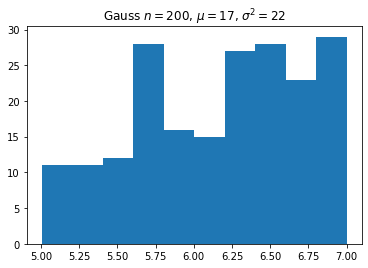

In [90]:
n = 200
a = 5
b = 7
gauss = get_truncated_normal(17, 22**0.5, a, b)
gauss_sample = np.sort(gauss.rvs(n))
plt.hist(gauss_sample)
plt.title('Gauss $n = 200$, $\mu = 17$, $\sigma^2 = 22$')
plt.show()

In [87]:
print_statistics(gauss_sample)

Expectation: 6.174351893561723
Variance: 0.3106601577500448
Median: 6.260236597295935
1/4 and 1/3 quantil: 5.7086204587390545, 5.919127107109431
Corrected variance: 0.3122212640703968
Skewness: -0.3763908220566208
Excess: 1.9680188645414172
Variation coef: 0.09027165438066105


In [220]:
poisson = generate_poission(n, 9, a, b)[:n]
print_statistics(poisson)

Expectation: 6.21028
Variance: 0.6170823216000001
Median: 6.5
1/4 and 1/3 quantil: 6.0, 6.0
Corrected variance: 0.6170829386829388
Skewness: -0.3884475667429227
Excess: 1.7175071965527977
Variation coef: 0.12649121696889082


In [237]:
exp = generate_exponential(n, 3, a, b)
print(np.size(exp))

1000000
91756
